<div style="background: linear-gradient(to right, #3a7bd5, #00d2ff); color: white; padding: 12px; text-align: center; border-radius: 10px; font-size: 20px; font-weight: bold;">
    SVM Classification and Confusion Matrix
</div>

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">

**Support Vector Machine (SVM) Classification:**

Support Vector Machines are supervised learning models used for binary (and multi-class) classification. An SVM finds the optimal hyperplane that maximally separates data points of different classes by focusing on the points (support vectors) closest to the boundary. This margin-maximizing approach often yields robust performance, especially in high-dimensional spaces, and can be extended to non-linear boundaries using kernel functions.

**Confusion Matrix:**

A confusion matrix is a tabular summary of a classifier’s performance, showing counts of true versus predicted labels. For a binary problem, it contains four entries: True Positives (correct positive predictions), False Positives (negative instances mislabeled as positive), True Negatives, and False Negatives, enabling calculation of accuracy, precision, recall, and other evaluation metrics.

</div>

**1.1 Importing the Libraries**

In [317]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">
    
In this step, we’re simply pulling in all the libraries we’ll need to go from raw data to a trained SVM and its evaluation.

- Data handling & visualization: `Pandas and NumPy` for loading/manipulating arrays and tables, plus Seaborn/Matplotlib for quick plots.

- Preprocessing & splitting: `Scikit-learn’s` routines to encode labels, scale features, and carve out training vs. test sets.

- Model & metrics: The SVC class to build the Support Vector Machine, and functions to generate a `confusion matrix and classification report` once it’s fitted.

</div>

**1.2 Loading the Dataset**

In [321]:
#Load the dataset
df = pd.read_excel('penguins.xlsx')

#Preview first 5 rows of the dataset
df.head()

,"Species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g"
0,"Adelie,39.1,18.7,181,3750"
1,"Adelie,39.5,17.4,186,3800"
2,"Adelie,40.3,18,195,3250"
3,"Adelie,36.7,19.3,193,3450"
4,"Adelie,39.3,20.6,190,3650"


<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">
    
In this step, we’re bringing the raw data into Python and taking a quick look at it:

- `pd.read_excel('penguins.xlsx')` reads the Excel file into a Pandas DataFrame, so we can manipulate it as a table in memory.

- `df.head()` displays the first five rows, giving us a sneak-peek at the columns and some sample values, an essential sanity check before any further processing.

However, the result is not what we expected. All the values are inside a single column. We need to split them into each columns before performing analysis

</div>

**1.2.1 Splitting the Single Column to Multiple**

In [325]:
# Split the single column into multiple columns using commas
df_split = df[df.columns[0]].str.split(',', expand=True) # expand=True will ensure each split into each column

# Set column names
df_split.columns = ['Species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Preview the result
df_split.head()

,Species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650


<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">
    
In this step, we take the raw text column of comma-separated values and turn it into a structured DataFrame by splitting each entry into its component fields, giving those new columns clear names, and then peeking at the first few rows to make sure everything parsed correctly.

</div>

In [328]:
# Saving the file for future use
df_split.to_csv('clean_penguins.csv', index=False)

**1.3 Explore and Clean the Data**

In [331]:
# Checking the datatypes of the dataframe
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Species            342 non-null    object
 1   bill_length_mm     342 non-null    object
 2   bill_depth_mm      342 non-null    object
 3   flipper_length_mm  342 non-null    object
 4   body_mass_g        342 non-null    object
dtypes: object(5)
memory usage: 13.5+ KB


<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">
    
- In this step we get a bird’s-eye view of our freshly split DataFrame by calling `df_split.info()`. This tells us each column’s data type and how many non-null entries it has, so we can spot any unexpected types (e.g. strings instead of numbers) or missing values before we move on to more detailed cleaning and analysis.

- It seems that variables except for Species are object and not as numeric. Hence, we need to convert them before working further.
</div>

In [334]:
# Convert all columns except Species to numeric
for col in df_split.columns[1:]:
    df_split[col] = pd.to_numeric(df_split[col], errors='coerce') # Errors = 'coerce' will transform non-convertibles to NaN, instead of giving errors

# Check the updated data types
print(df_split.dtypes)

Species               object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm      int64
body_mass_g            int64
dtype: object


<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">
    
In this step, we convert our newly split measurement columns from strings into true numeric types—using `pd.to_numeric(..., errors='coerce')` so that any malformed values become `NaN` and then print out the DataFrame’s dtypes to confirm that each column (aside from `Species`) is now numeric and ready for analysis.

</div>

In [337]:
# Computing basic statistics for the dataset
df_split.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">

- In this step, we generate a quick statistical overview of all our numeric columns by calling `df_split.describe()`. 

- These summary metrics help us spot outliers, understand the central tendency and variability of each feature, and confirm that the data’s range and distribution look reasonable before moving on to modeling.

</div>

In [340]:
# Checking missing values
df_split.isnull().sum()

Species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">

In this step, we scan each column for any missing entries by summing up the boolean mask returned by `df_split.isnull()`. This tells us exactly how many `NaN`s if any are present in each field, so we can decide whether to impute, drop, or otherwise handle those gaps before moving on.

</div>

**1.4 Preprocess the Data**

In [344]:
# Encode the categorical variable "Species"
df_split['Species_Encoded'] = df_split['Species'].astype('category').cat.codes

# View the encoded variable
df_split

,Species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Species_Encoded
0,Adelie,39.1,18.7,181,3750,0
1,Adelie,39.5,17.4,186,3800,0
2,Adelie,40.3,18.0,195,3250,0
3,Adelie,36.7,19.3,193,3450,0
4,Adelie,39.3,20.6,190,3650,0
...,...,...,...,...,...,...
337,Chinstrap,55.8,19.8,207,4000,1
338,Chinstrap,43.5,18.1,202,3400,1
339,Chinstrap,49.6,18.2,193,3775,1
340,Chinstrap,50.8,19.0,210,4100,1


<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">

In this step, we convert our categorical Species labels into numeric codes so the model can use them:

- We encode the species: `df_split['Species'].astype('category').cat.codes` to map each unique species name to an integer, and store the result in a new column, **Species_Encoded**.

- We inspect the updated table: Simply displaying `df_split` lets us confirm that each original species string now has a corresponding numeric code alongside the rest of our data.

</div>

In [347]:
# Define features and target
X = df_split[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
Y = df_split['Species_Encoded']

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">
    
In this step, we separate our inputs from the output:

- We define the feature matrix `X`: We select the four numeric measurements—`bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g` as our predictors.

- We define the target vector `Y`: We assign the encoded species labels `(Species_Encoded)` as what we want the model to learn to predict.

</div>

In [350]:
# Standardize the numeric variables
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.04154272,  0.53188718, -0.56371522, -0.53292256],
       [ 1.26166175,  0.93758646,  0.64701263, -0.1270689 ],
       [ 1.15160224,  0.78544923, -0.20761879, -0.53292256]])

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">

In this step, we’re ensuring all four measurement features live on the same scale at zero mean and unit variance so that the SVM treats them equally:

- Instantiate the scaler: We create a `StandardScaler()` object.

- Fit on our data: Calling `scaler.fit(X)` computes each feature’s mean and standard deviation.

- Transform the features: `scaler.transform(X)` subtracts the mean and divides by the standard deviation for every value, producing `X_scaled`, a numeric array where each column now has mean 0 and variance 1.

</div>

**1.5 Split the Data as 70% Train and 30% Test**

In [354]:
# Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 50)

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">

In this step, we partition our standardized data into training and testing sets so we can both train the SVM and then evaluate it on unseen data:

- We call: `train_test_split(X_scaled, Y, test_size=0.3, random_state=50)` to randomly assign 70% of the samples to X_train/Y_train and 30% to X_test/Y_test.

- We use `random_state=50` to ensure that our split is reproducible every time we run the code.

</div>

**1.6 Build and Train the SVM Model**

In [358]:
# Build and Train the SVM Model
model = SVC(kernel = 'linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">

In this step, we put our SVM in motion:

- We instantiate the classifier: We create an `SVC` object with a linear kernel `(kernel='linear')`, telling it to look for a straight-line (hyperplane) decision boundary.

- We train (fit) the model: We call `model.fit(X_train, Y_train)`, which uses our 70% training data to find the optimal hyperplane that separates the species in feature space.

After this, `model` holds our trained SVM, ready to make predictions on new (test) data.

</div>

**1.7 Predict and Evaluate the Test Dataset**

In [362]:
# Predict on the test set
Y_predict = model.predict(X_test)

# Generating classification report 
report = classification_report(Y_test, Y_predict, target_names = df_split['Species'].unique())

#Generating confusion matrix
matrix = confusion_matrix(Y_test, Y_predict)

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">

In this step we put our trained SVM to the test and quantify how well it performs:

- We generate predictions: `Y_predict = model.predict(X_test)` to have our SVM assign a species label to each unseen test sample.

- We produce detailed performance metrics: `classification_report(Y_test, Y_predict, target_names=df_split['Species'].unique())` we get precision, recall, F1-score and support for each species, helping us understand where the model excels or struggles.

- We build the confusion matrix: `confusion_matrix(Y_test, Y_predict)` we tabulate true vs. predicted labels in a simple grid, so we can immediately spot which species are being confused with one another.

</div>

In [365]:
# Displaying the report and matrix
print("Classification Report:\n")
print(report)
print("Consfusion Matrix:\n")
print(matrix)

Classification Report:

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        50
      Gentoo       1.00      0.94      0.97        18
   Chinstrap       1.00      1.00      1.00        35

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.99       103
weighted avg       0.99      0.99      0.99       103

Consfusion Matrix:

[[50  0  0]
 [ 1 17  0]
 [ 0  0 35]]


**1.8 Plot the Confusion Matrix in HeatMap**

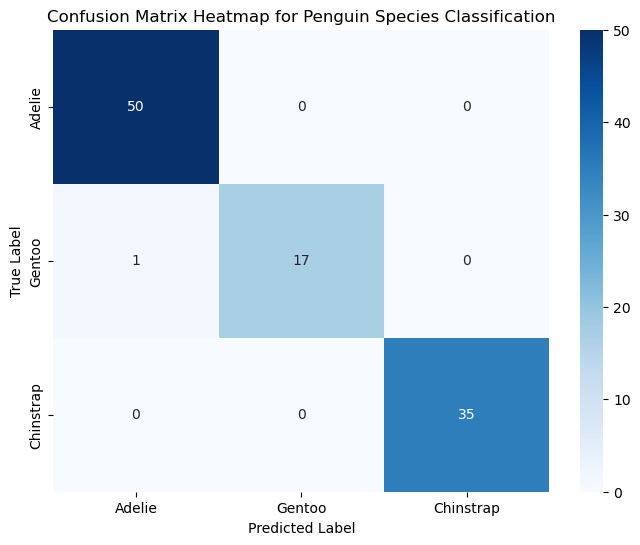

In [368]:
# Plotting HeatMap
plt.figure(figsize = (8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', # annot=True and fmt='d' will overlay the actual number of predictions in each cell
            xticklabels=df_split['Species'].unique(), 
            yticklabels=df_split['Species'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for Penguin Species Classification')
plt.show()

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">

**1.9 Interpretation of Results**

1. **Which species were classified accurately?**

    - Adelie and Chinstrap penguins were classified with perfect or near-perfect accuracy.

        - *Adelie*: All 50 test samples were predicted correctly (100% recall).

        - *Chinstrap*: All 35 test samples were also classified correctly (100% recall and precision).

2. **Were there any species that the model struggled with?**

    - The model slightly struggled with Gentoo penguins:

        - 1 out of 18 Gentoo samples was misclassified as Adelie (as shown in the confusion matrix).

        - This caused Gentoo's recall to drop slightly to 0.94, though precision remained perfect at 1.00.

3. **Comment on precision, recall, and F1-score for each class:**

    - Adelie:

        - Precision = 0.98, Recall = 1.00, F1-score = 0.99

        - The model rarely misclassifies others as Adelie, and never misses an Adelie sample.

    - Gentoo:

        - Precision = 1.00, Recall = 0.94, F1-score = 0.97

        - All predicted Gentoos were correct, but one Gentoo was wrongly classified as Adelie.

    - Chinstrap:

        - Precision = 1.00, Recall = 1.00, F1-score = 1.00

        - Perfect performance where every Chinstrap was identified correctly, and none were confused.

4. **Why might some classes be harder or easier to classify?**

    - Adelie and Chinstrap might have more distinct feature values (e.g. bill length, depth, body mass), making them easier to separate.

    - Gentoo may overlap more in feature space with Adelie in some dimensions, especially if one or more features (like flipper length or body mass) vary across a wide range. This overlap could explain why the model misclassified one Gentoo sample.

  
The SVM model performed extremely well overall, **achieving 99% accuracy**. It classified Chinstrap and Adelie perfectly, while only one Gentoo was misclassified, likely due to feature similarity with Adelie.

</div>

**2.0 Decision Boundary Plot Using Only Two Features**

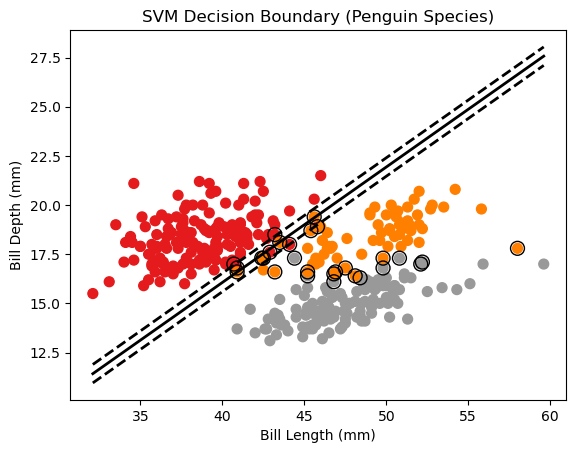

In [372]:
# Extract features and target
X = df_split[['bill_length_mm', 'bill_depth_mm']].values
y = df_split['Species_Encoded'].values

# Fit the SVM model
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(X, y)

# Define decision boundary plot
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1 / np.linalg.norm(w)
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', s=50)
plot_svc_decision_boundary(svm_clf, X[:, 0].min(), X[:, 0].max())
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("SVM Decision Boundary (Penguin Species)")
plt.show()

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">
    
With the above code, it only separates one species and other two species. Hence, we will proceed to separate all 3 species

</div>

**2.0.1 Displaying Decision Boundary for all 3 Species Using Only Two Features**

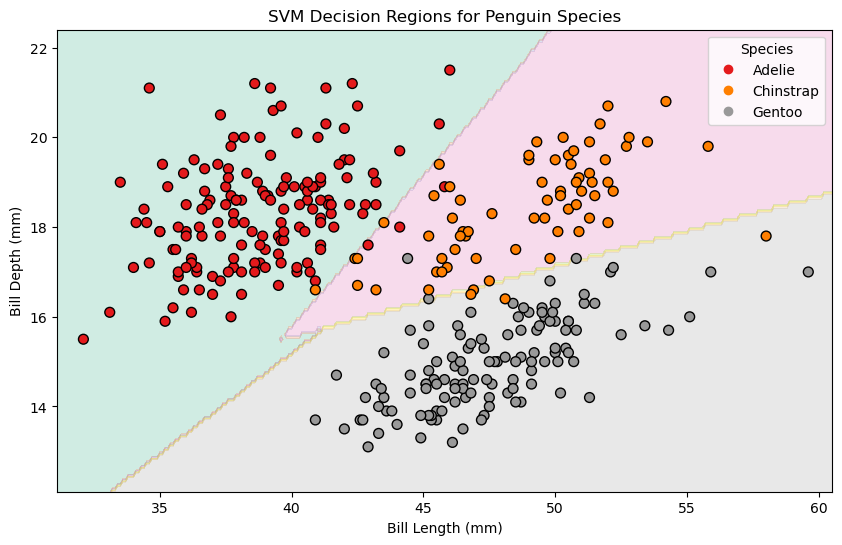

In [379]:
# Prepare features and target
X = df_split[['bill_length_mm', 'bill_depth_mm']].values
y = df_split['Species_Encoded'].values

# Train the SVM
svm_clf = SVC(kernel='linear', decision_function_shape='ovr')  # OvR is used internally by OvO; OvR - one vs rest and OvO - one vs one
svm_clf.fit(X, y)

# Create a mesh grid
h = 0.1  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each grid point
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set2')  # background color by class
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolor='k', s=50)

# Extract unique encoded labels and their corresponding species names
unique_encoded = np.sort(df_split['Species_Encoded'].unique())
species_names = df_split.drop_duplicates(subset='Species_Encoded').sort_values('Species_Encoded')['Species']

# Convert to list for legend
species_labels = species_names.tolist()

# Label axes
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('SVM Decision Regions for Penguin Species')
handles, _ = scatter.legend_elements()
plt.legend(handles=handles, title="Species", labels=species_labels)
plt.show()

<div style="background-color: #dbefff; padding: 15px; border-radius: 8px;">
    
1. **Prepare Features and Target**

    - Extract two numerical features: `bill_length_mm` and `bill_depth_mm`.

    - Use `Species_Encoded` as the target variable (numeric class labels).

2. **Train the SVM Model**

    - Initialize an SVM classifier with a linear kernel.

    - Use `decision_function_shape='ovr'` (One-vs-Rest) for multiclass classification.

    - Train the model using the selected features and encoded labels.

3. **Create a Mesh Grid for Plotting**

    - Define a step size `h` to control the resolution of the grid.

    - Determine the min and max values for both features to define plot boundaries.

    - Use `np.meshgrid` to create a grid of (x, y) coordinates over the feature space.

4. **Predict on the Mesh Grid**

    - Flatten the grid and predict class labels using the trained model.

    - Reshape the predicted results (`Z`) to match the mesh shape for contour plotting.

5. **Plot the Decision Boundaries**

    - Use `plt.contourf` to fill decision regions with different background colors.

    - Overlay the actual data points using `plt.scatter`, colored by true species class.

6. **Customize the Legend**

    - Match encoded values to actual species names using the `Species` column.

    - Extract unique encoded labels and their corresponding species names.

    - Generate a legend using these labels for clear interpretation.

7. **Final Touches**

    - Add axis labels (`Bill Length`, `Bill Depth`) and a plot title.

    - Add a grid with light dashed lines for readability.

    - Display the plot using `plt.show()`.
  
</div>